In [1]:
import numpy as np
import pandas as pd

In [2]:
import talib as ta

In [3]:
import FinanceDataReader as fdr

In [4]:
# 이동평균선 등의 지표 NaN 값을 없애기 위해 Target 시작 연월의 앞전 6개월 전부터 데이터를 얻는다.
samsung_2019 = fdr.DataReader('005930','2018-6-01', '2019-12-31')
# Talib 사용을 위해 컬럼명을 모두 소문자로 변환하는 코드(Talib은 컬럼명으로 소문자만 인식)
samsung_2019.columns = list(map(lambda x : x.lower(), samsung_2019.columns))
samsung_2019

,open,high,low,close,volume,change
Date,,,,,,
2018-06-01,50500,51700,49950,51300,13038499,0.011834
2018-06-04,50800,51200,50700,51100,9767171,-0.003899
2018-06-05,51100,51400,50400,51300,9144100,0.003914
2018-06-07,51800,51800,50500,50600,13590016,-0.013645
2018-06-08,50200,50400,49600,49650,16951706,-0.018775
...,...,...,...,...,...,...
2019-12-23,56100,56400,55100,55500,9839252,-0.008929
2019-12-24,55600,55700,54800,55000,11868463,-0.009009
2019-12-26,54700,55400,54400,55400,9645034,0.007273


### MACD(Moving Average Convergence & Divergence) : 이동평균수렴·확산지수
- 지수이동평균선들(EMAs:Exponential Moving Average)간의 차이로 주가 상승하락 신호파악 (일반적으로 12일, 26일)
- EMA는 단순MA 처럼 과거 데이터를 완전히 버리지 않고, 가중치가 하락함에 따라 점차 사라지게 한다.


- macd선이 시그널 선을 넘으면 매수/ 아니면 매도

- MACD line : ema12 - ema26
- MACD_signal : MACD의 9일 지수이동평균  (즉, 이평선의 이평선)
- MACD_hist :

In [5]:
# EMA(Exponential Moving Average) 얻기
samsung_2019['ema12'] = ta.EMA(samsung_2019['close'], timeperiod=12)

In [6]:
samsung_2019['ema26'] = ta.EMA(samsung_2019['close'], timeperiod=26)

In [7]:
samsung_2019['ema12-ema26'] = samsung_2019['ema12']- samsung_2019['ema26']

In [8]:
# MACD 함수 디폴트 조건
macd, macdsignal, macdhist = ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)

NameError: name 'close' is not defined

In [9]:
macd, macdsignal, macdhist = ta.MACD(samsung_2019['close'])

In [10]:
samsung_2019['macd'] = macd
samsung_2019['macd_signal']=macdsignal
samsung_2019['macd_hist']=macdhist

In [11]:
samsung_2019['macd_9ma'] = ta.EMA(macd, timeperiod=9)

In [12]:
samsung_2019.loc['2019-01-01':,:]

,open,high,low,close,volume,change,ema12,ema26,ema12-ema26,macd,macd_signal,macd_hist,macd_9ma
Date,,,,,,,,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292,39071.423826,40147.369825,-1075.945999,-1075.946000,-1090.830000,14.884000,-1090.830000
2019-01-03,38300,38550,37450,37600,12471493,-0.029677,38845.050930,39958.675764,-1113.624834,-1113.624835,-1095.388967,-18.235868,-1095.388967
2019-01-04,37450,37600,36850,37450,14108958,-0.003989,38630.427710,39772.847930,-1142.420220,-1142.420220,-1104.795217,-37.625003,-1104.795217
2019-01-07,38000,38900,37800,38750,12748997,0.034713,38648.823447,39697.081416,-1048.257970,-1048.257970,-1093.487768,45.229798,-1093.487768
2019-01-08,38000,39200,37950,38100,12756554,-0.016774,38564.389070,39578.779089,-1014.390019,-1014.390019,-1077.668218,63.278199,-1077.668218
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,56100,56400,55100,55500,9839252,-0.008929,54415.887753,53151.002949,1264.884803,1264.884803,828.149158,436.735646,828.149158
2019-12-24,55600,55700,54800,55000,11868463,-0.009009,54505.751175,53287.965694,1217.785482,1217.785482,906.076423,311.709059,906.076423
2019-12-26,54700,55400,54400,55400,9645034,0.007273,54643.327918,53444.412679,1198.915238,1198.915238,964.644186,234.271052,964.644186


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
import datetime

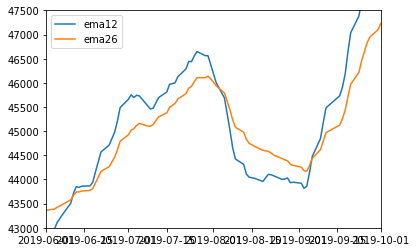

In [15]:
# ema12, ema26 (macd에 이용되는) 그래프 시각화
plt.figure()
plt.plot(samsung_2019['ema12'], label ='ema12')
plt.plot(samsung_2019['ema26'], label ='ema26')
plt.legend()
plt.ylim(43000, 47500)
plt.xlim(datetime.date(2019, 6, 1), datetime.date(2019,10,1))
plt.show()

In [1]:
#MACD 그래프 시각화
plt.figure()
plt.plot(samsung_2019['macd'], label ='macd')
plt.plot(samsung_2019['macd_signal'], label = 'macd_signal')
# plt.plot(samsung_2019['macd_hist'], label = 'macd_hist')

plt.ylim(-500, 500)
plt.xlim(datetime.date(2019, 6, 1), datetime.date(2019,10,1))
plt.legend()
plt.show()

NameError: name 'plt' is not defined

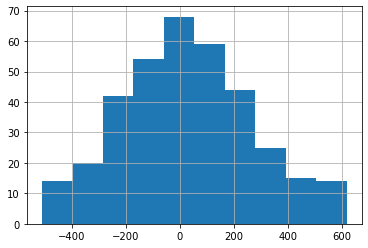

In [17]:
samsung_2019['macd_hist'].hist()

In [18]:
# MACD 선이 signal 선을 넘어가면 매수 / 떨어지면 매도
macd_minius_signal = macd - macdsignal
samsung_2019['macd-macd_signal']=macd_minius_signal
samsung_2019.loc['2019-01-01':,:].head()

,open,high,low,close,volume,change,ema12,ema26,ema12-ema26,macd,macd_signal,macd_hist,macd_9ma,macd-macd_signal
Date,,,,,,,,,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292,39071.423826,40147.369825,-1075.945999,-1075.946000,-1090.830000,14.884000,-1090.830000,14.884000
2019-01-03,38300,38550,37450,37600,12471493,-0.029677,38845.050930,39958.675764,-1113.624834,-1113.624835,-1095.388967,-18.235868,-1095.388967,-18.235868
2019-01-04,37450,37600,36850,37450,14108958,-0.003989,38630.427710,39772.847930,-1142.420220,-1142.420220,-1104.795217,-37.625003,-1104.795217,-37.625003
2019-01-07,38000,38900,37800,38750,12748997,0.034713,38648.823447,39697.081416,-1048.257970,-1048.257970,-1093.487768,45.229798,-1093.487768,45.229798
2019-01-08,38000,39200,37950,38100,12756554,-0.016774,38564.389070,39578.779089,-1014.390019,-1014.390019,-1077.668218,63.278199,-1077.668218,63.278199


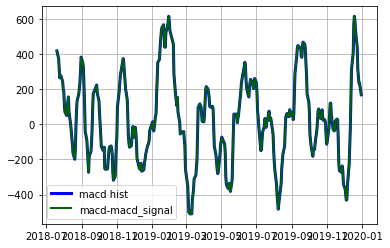

In [19]:
#  MACD Hist = MACD- MACD_signal 의 시각화 : 강한 양수 추세를 보이면 매수/ 음수 추세를 보이면 매도 (다시 정확히 이해 한후 보기)
plt.figure()
plt.plot(samsung_2019['macd_hist'], label ='macd hist', c='blue', linewidth =3)
plt.plot(samsung_2019['macd-macd_signal'], label ='macd-macd_signal', c='darkgreen', linewidth=2)

# plt.xlim(datetime.date(2019,1,2), datetime.date(2019,5,1))
plt.grid()
plt.legend()

plt.show()

- macd hist 는 macd-macd_signal한 값이다

- MACD hist 에 있어서 만약 단순히 이해한것이 맞다면, 0 이상으로 지표가 반전되는 시점에 매수해야하고, 0 이하로 반전되는 시점이 매도시점이다
- 왜냐하면 그래프가 어느정도 추세를 그리면서 그려지기 때문에 상승 시점에 사더라도 당분간은 양의 수를 유지하게 되며, 하강 시점 또한 당분한 곡선을 그리는 동안에는 음수를 유지한다



- 매수, 매도 신호가 가끔 나타나게된다.
- 종목을 다각화하면, 신호가 나타나는 주기가 어느정도 짧아지지 않을까?

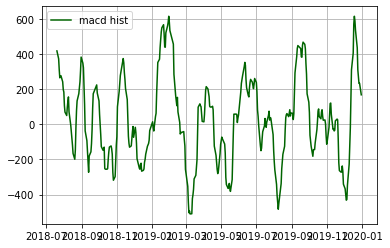

In [20]:
#  MACD- MACD_signal 의 시각화 : 강한 양수 추세를 보이면 매수/ 음수 추세를 보이면 매도 (다시 정확히 이해 한후 보기)
plt.figure()
plt.plot(samsung_2019['macd_hist'], label ='macd hist', c='darkgreen')

# plt.xlim(datetime.date(2019,1,2), datetime.date(2019,5,1))
plt.grid()
plt.legend()

plt.show()

- 매수시점을 파악하기 위해,macdhist의 수치에서, -에서 +값으로 반전되는 시점을 추출하기


In [21]:
samsung_2019['macd_hist'][-1]>0

True

In [22]:
# 새로운 데이터가 매일 들어온다는 가정하에, 매수 매도 신호를 얻는 방법
if samsung_2019['macd_hist'][-2]>0: 
    if samsung_2019['macd_hist'][-1]<0:
        print('매도신호')
    else: 
        print('관망')

elif samsung_2019['macd_hist'][-2]<0:
    if samsung_2019['macd_hist'][-1]>0:
        print('매수신호')
    else: 
        print('관망')

관망


- 위의 원리로 완전한 매수는 1, 매도는 -1, 관망은 0이라고 지정해두고, 사이값을 의미있게 얻을 수 있는 방법 고민하기

In [23]:
samsung_2019_=samsung_2019.loc['2019-01-01':,:]

In [24]:
samsung_2019_.head()

,open,high,low,close,volume,change,ema12,ema26,ema12-ema26,macd,macd_signal,macd_hist,macd_9ma,macd-macd_signal
Date,,,,,,,,,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292,39071.423826,40147.369825,-1075.945999,-1075.946000,-1090.830000,14.884000,-1090.830000,14.884000
2019-01-03,38300,38550,37450,37600,12471493,-0.029677,38845.050930,39958.675764,-1113.624834,-1113.624835,-1095.388967,-18.235868,-1095.388967,-18.235868
2019-01-04,37450,37600,36850,37450,14108958,-0.003989,38630.427710,39772.847930,-1142.420220,-1142.420220,-1104.795217,-37.625003,-1104.795217,-37.625003
2019-01-07,38000,38900,37800,38750,12748997,0.034713,38648.823447,39697.081416,-1048.257970,-1048.257970,-1093.487768,45.229798,-1093.487768,45.229798
2019-01-08,38000,39200,37950,38100,12756554,-0.016774,38564.389070,39578.779089,-1014.390019,-1014.390019,-1077.668218,63.278199,-1077.668218,63.278199


In [25]:
# 2019년 데이터에 대하여 for문을 돌려서 매일의 지표가 어떻게 되었는지 입력하는 컬럼 추가하기
samsung_2019_.index


DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
               '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-26',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', name='Date', length=246, freq=None)

일단 세개정도의 지표를 만들어 놓고, 알고리즘에 넣어서 테스트 해보면서 추가해나가자

- 단순히 macdhist를 feature 화 해서도 change 와의 연관성확인해보자

### BBANDS(pca차원축소한 컬럼)과, macdhist 두가지 feature로 close 와의 상관관계 확인하기

In [27]:
samsung_2019__=samsung_2019.loc['2019-01-03':,:]

In [28]:
samsung_2019_['nextday_close'] = samsung_2019__['close']

C:\Users\TJ\anaconda3\envs\py37_32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
samsung_2019_

,open,high,low,close,volume,change,ema12,ema26,ema12-ema26,macd,macd_signal,macd_hist,macd_9ma,macd-macd_signal,nextday_close
Date,,,,,,,,,,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292,39071.423826,40147.369825,-1075.945999,-1075.946000,-1090.830000,14.884000,-1090.830000,14.884000,NaN
2019-01-03,38300,38550,37450,37600,12471493,-0.029677,38845.050930,39958.675764,-1113.624834,-1113.624835,-1095.388967,-18.235868,-1095.388967,-18.235868,37600.0
2019-01-04,37450,37600,36850,37450,14108958,-0.003989,38630.427710,39772.847930,-1142.420220,-1142.420220,-1104.795217,-37.625003,-1104.795217,-37.625003,37450.0
2019-01-07,38000,38900,37800,38750,12748997,0.034713,38648.823447,39697.081416,-1048.257970,-1048.257970,-1093.487768,45.229798,-1093.487768,45.229798,38750.0
2019-01-08,38000,39200,37950,38100,12756554,-0.016774,38564.389070,39578.779089,-1014.390019,-1014.390019,-1077.668218,63.278199,-1077.668218,63.278199,38100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,56100,56400,55100,55500,9839252,-0.008929,54415.887753,53151.002949,1264.884803,1264.884803,828.149158,436.735646,828.149158,436.735646,55500.0
2019-12-24,55600,55700,54800,55000,11868463,-0.009009,54505.751175,53287.965694,1217.785482,1217.785482,906.076423,311.709059,906.076423,311.709059,55000.0
2019-12-26,54700,55400,54400,55400,9645034,0.007273,54643.327918,53444.412679,1198.915238,1198.915238,964.644186,234.271052,964.644186,234.271052,55400.0


In [30]:
samsung_2019_['next_close'] = samsung_2019_['close'].shift(-1)

C:\Users\TJ\anaconda3\envs\py37_32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
samsung_2019_['next_change'] = samsung_2019_['change'].shift(-1)

C:\Users\TJ\anaconda3\envs\py37_32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
samsung_2019_

,open,high,low,close,volume,change,ema12,ema26,ema12-ema26,macd,macd_signal,macd_hist,macd_9ma,macd-macd_signal,nextday_close,next_close,next_change
Date,,,,,,,,,,,,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292,39071.423826,40147.369825,-1075.945999,-1075.946000,-1090.830000,14.884000,-1090.830000,14.884000,NaN,37600.0,-0.029677
2019-01-03,38300,38550,37450,37600,12471493,-0.029677,38845.050930,39958.675764,-1113.624834,-1113.624835,-1095.388967,-18.235868,-1095.388967,-18.235868,37600.0,37450.0,-0.003989
2019-01-04,37450,37600,36850,37450,14108958,-0.003989,38630.427710,39772.847930,-1142.420220,-1142.420220,-1104.795217,-37.625003,-1104.795217,-37.625003,37450.0,38750.0,0.034713
2019-01-07,38000,38900,37800,38750,12748997,0.034713,38648.823447,39697.081416,-1048.257970,-1048.257970,-1093.487768,45.229798,-1093.487768,45.229798,38750.0,38100.0,-0.016774
2019-01-08,38000,39200,37950,38100,12756554,-0.016774,38564.389070,39578.779089,-1014.390019,-1014.390019,-1077.668218,63.278199,-1077.668218,63.278199,38100.0,39600.0,0.039370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,56100,56400,55100,55500,9839252,-0.008929,54415.887753,53151.002949,1264.884803,1264.884803,828.149158,436.735646,828.149158,436.735646,55500.0,55000.0,-0.009009
2019-12-24,55600,55700,54800,55000,11868463,-0.009009,54505.751175,53287.965694,1217.785482,1217.785482,906.076423,311.709059,906.076423,311.709059,55000.0,55400.0,0.007273
2019-12-26,54700,55400,54400,55400,9645034,0.007273,54643.327918,53444.412679,1198.915238,1198.915238,964.644186,234.271052,964.644186,234.271052,55400.0,56500.0,0.019856


In [33]:
new_features = samsung_2019_[['open','close','volume','macd_hist','next_close']]

In [34]:
new_features['next_change'] = samsung_2019_['next_change']

C:\Users\TJ\anaconda3\envs\py37_32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
new_features['change'] = samsung_2019_['change']

C:\Users\TJ\anaconda3\envs\py37_32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
new_features

,open,close,volume,macd_hist,next_close,next_change,change
Date,,,,,,,
2019-01-02,39400,38750,7847664,14.884000,37600.0,-0.029677,0.001292
2019-01-03,38300,37600,12471493,-18.235868,37450.0,-0.003989,-0.029677
2019-01-04,37450,37450,14108958,-37.625003,38750.0,0.034713,-0.003989
2019-01-07,38000,38750,12748997,45.229798,38100.0,-0.016774,0.034713
2019-01-08,38000,38100,12756554,63.278199,39600.0,0.039370,-0.016774
...,...,...,...,...,...,...,...
2019-12-23,56100,55500,9839252,436.735646,55000.0,-0.009009,-0.008929
2019-12-24,55600,55000,11868463,311.709059,55400.0,0.007273,-0.009009
2019-12-26,54700,55400,9645034,234.271052,56500.0,0.019856,0.007273


In [37]:
# 볼린저 밴드
samsung_2019['upperband'], samsung_2019['middleband'], samsung_2019['lowerband'] = \
ta.BBANDS(samsung_2019.close, timeperiod=20)

In [38]:
new_features['upperband']=samsung_2019.loc['2019-01-01':,:]['upperband']
new_features['middleband']=samsung_2019.loc['2019-01-01':,:]['middleband']
new_features['lowerband']=samsung_2019.loc['2019-01-01':,:]['lowerband']

C:\Users\TJ\anaconda3\envs\py37_32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\TJ\anaconda3\envs\py37_32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\TJ\anaconda3\envs\py37_32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [39]:
samsung_2019.loc['2019-01-01':,:]

,open,high,low,close,volume,change,ema12,ema26,ema12-ema26,macd,macd_signal,macd_hist,macd_9ma,macd-macd_signal,upperband,middleband,lowerband
Date,,,,,,,,,,,,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292,39071.423826,40147.369825,-1075.945999,-1075.946000,-1090.830000,14.884000,-1090.830000,14.884000,42443.730990,39772.5,37101.269010
2019-01-03,38300,38550,37450,37600,12471493,-0.029677,38845.050930,39958.675764,-1113.624834,-1113.624835,-1095.388967,-18.235868,-1095.388967,-18.235868,41801.190170,39490.0,37178.809830
2019-01-04,37450,37600,36850,37450,14108958,-0.003989,38630.427710,39772.847930,-1142.420220,-1142.420220,-1104.795217,-37.625003,-1104.795217,-37.625003,41385.234729,39255.0,37124.765271
2019-01-07,38000,38900,37800,38750,12748997,0.034713,38648.823447,39697.081416,-1048.257970,-1048.257970,-1093.487768,45.229798,-1093.487768,45.229798,41004.781154,39120.0,37235.218846
2019-01-08,38000,39200,37950,38100,12756554,-0.016774,38564.389070,39578.779089,-1014.390019,-1014.390019,-1077.668218,63.278199,-1077.668218,63.278199,40822.635454,39000.0,37177.364546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,56100,56400,55100,55500,9839252,-0.008929,54415.887753,53151.002949,1264.884803,1264.884803,828.149158,436.735646,828.149158,436.735646,57535.682876,52652.5,47769.317124
2019-12-24,55600,55700,54800,55000,11868463,-0.009009,54505.751175,53287.965694,1217.785482,1217.785482,906.076423,311.709059,906.076423,311.709059,57782.396880,52812.5,47842.603120
2019-12-26,54700,55400,54400,55400,9645034,0.007273,54643.327918,53444.412679,1198.915238,1198.915238,964.644186,234.271052,964.644186,234.271052,58057.917879,52972.5,47887.082121


In [40]:
new_features

,open,close,volume,macd_hist,next_close,next_change,change,upperband,middleband,lowerband
Date,,,,,,,,,,
2019-01-02,39400,38750,7847664,14.884000,37600.0,-0.029677,0.001292,42443.730990,39772.5,37101.269010
2019-01-03,38300,37600,12471493,-18.235868,37450.0,-0.003989,-0.029677,41801.190170,39490.0,37178.809830
2019-01-04,37450,37450,14108958,-37.625003,38750.0,0.034713,-0.003989,41385.234729,39255.0,37124.765271
2019-01-07,38000,38750,12748997,45.229798,38100.0,-0.016774,0.034713,41004.781154,39120.0,37235.218846
2019-01-08,38000,38100,12756554,63.278199,39600.0,0.039370,-0.016774,40822.635454,39000.0,37177.364546
...,...,...,...,...,...,...,...,...,...,...
2019-12-23,56100,55500,9839252,436.735646,55000.0,-0.009009,-0.008929,57535.682876,52652.5,47769.317124
2019-12-24,55600,55000,11868463,311.709059,55400.0,0.007273,-0.009009,57782.396880,52812.5,47842.603120
2019-12-26,54700,55400,9645034,234.271052,56500.0,0.019856,0.007273,58057.917879,52972.5,47887.082121


In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components=1)

In [43]:
pca.fit(new_features[['upperband','middleband','lowerband']])
# 3개 컬럼을 압축한 새로운 feature bol_pca 생성
bol_pca = pca.transform(new_features[['upperband','middleband','lowerband']])
new_features['bolinger_pca']=bol_pca

C:\Users\TJ\anaconda3\envs\py37_32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [44]:
new_features

,open,close,volume,macd_hist,next_close,next_change,change,upperband,middleband,lowerband,bolinger_pca
Date,,,,,,,,,,,
2019-01-02,39400,38750,7847664,14.884000,37600.0,-0.029677,0.001292,42443.730990,39772.5,37101.269010,-10737.050454
2019-01-03,38300,37600,12471493,-18.235868,37450.0,-0.003989,-0.029677,41801.190170,39490.0,37178.809830,-11231.340214
2019-01-04,37450,37450,14108958,-37.625003,38750.0,0.034713,-0.003989,41385.234729,39255.0,37124.765271,-11640.870008
2019-01-07,38000,38750,12748997,45.229798,38100.0,-0.016774,0.034713,41004.781154,39120.0,37235.218846,-11878.100436
2019-01-08,38000,38100,12756554,63.278199,39600.0,0.039370,-0.016774,40822.635454,39000.0,37177.364546,-12086.801080
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,56100,55500,9839252,436.735646,55000.0,-0.009009,-0.008929,57535.682876,52652.5,47769.317124,11601.458289
2019-12-24,55600,55000,11868463,311.709059,55400.0,0.007273,-0.009009,57782.396880,52812.5,47842.603120,11879.779420
2019-12-26,54700,55400,9645034,234.271052,56500.0,0.019856,0.007273,58057.917879,52972.5,47887.082121,12158.501330


In [45]:
new_features_ = new_features.drop(['upperband','middleband','lowerband'], axis=1, inplace=False)

In [46]:
new_features_

,open,close,volume,macd_hist,next_close,next_change,change,bolinger_pca
Date,,,,,,,,
2019-01-02,39400,38750,7847664,14.884000,37600.0,-0.029677,0.001292,-10737.050454
2019-01-03,38300,37600,12471493,-18.235868,37450.0,-0.003989,-0.029677,-11231.340214
2019-01-04,37450,37450,14108958,-37.625003,38750.0,0.034713,-0.003989,-11640.870008
2019-01-07,38000,38750,12748997,45.229798,38100.0,-0.016774,0.034713,-11878.100436
2019-01-08,38000,38100,12756554,63.278199,39600.0,0.039370,-0.016774,-12086.801080
...,...,...,...,...,...,...,...,...
2019-12-23,56100,55500,9839252,436.735646,55000.0,-0.009009,-0.008929,11601.458289
2019-12-24,55600,55000,11868463,311.709059,55400.0,0.007273,-0.009009,11879.779420
2019-12-26,54700,55400,9645034,234.271052,56500.0,0.019856,0.007273,12158.501330


In [48]:
# 정규화하기(MinMax)
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler = MinMaxScaler()
new_features_scaled = scaler.fit_transform(new_features_)

In [50]:
new_features_scaled

array([[0.09974425, 0.06753247, 0.13891127, ..., 0.13490879, 0.51471223,
        0.05990946],
       [0.04347826, 0.00779221, 0.32556548, ..., 0.44994266, 0.13490879,
        0.04040443],
       [0.        , 0.        , 0.39166648, ..., 0.92458108, 0.44994266,
        0.02424409],
       ...,
       [0.88235294, 0.93246753, 0.2114673 , ..., 0.74237307, 0.58805896,
        0.96338453],
       [0.93350384, 0.98961039, 0.31916971, ..., 0.34692629, 0.74237307,
        0.98124229],
       [0.95907928, 0.95324675, 0.15946268, ...,        nan, 0.34692629,
        1.        ]])

In [51]:
new_features_scaled_df = pd.DataFrame(new_features_scaled, columns=new_features_.columns)

In [52]:
corr_ =new_features_scaled_df.corr()
corr_

,open,close,volume,macd_hist,next_close,next_change,change,bolinger_pca
open,1.000000,0.989124,-0.024564,0.119234,0.971135,-0.095068,-0.013738,0.901034
close,0.989124,1.000000,-0.025916,0.142569,0.984033,-0.085538,0.091817,0.892176
volume,-0.024564,-0.025916,1.000000,0.108236,-0.001124,0.106189,0.145719,-0.069778
macd_hist,0.119234,0.142569,0.108236,1.000000,0.146885,0.050612,0.220042,-0.290811
next_close,0.971135,0.984033,-0.001124,0.146885,1.000000,0.092459,0.112788,0.872388
next_change,-0.095068,-0.085538,0.106189,0.050612,0.092459,1.000000,0.050027,-0.097305
change,-0.013738,0.091817,0.145719,0.220042,0.112788,0.050027,1.000000,-0.086795
bolinger_pca,0.901034,0.892176,-0.069778,-0.290811,0.872388,-0.097305,-0.086795,1.000000


In [53]:
import seaborn as sns

In [54]:
corr__ = corr_[['macd_hist','bolinger_pca','next_change']]

In [55]:
corr__ = corr__.loc[['macd_hist','bolinger_pca','next_change'],:]

In [56]:
corr__

,macd_hist,bolinger_pca,next_change
macd_hist,1.000000,-0.290811,0.050612
bolinger_pca,-0.290811,1.000000,-0.097305
next_change,0.050612,-0.097305,1.000000


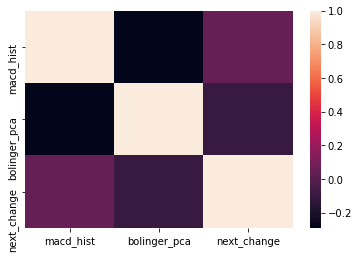

In [57]:
sns.heatmap(corr__)

- macd나 bolinger 지표는 바로 다음날의 가격 변화량과는 큰 연관관계가 없어보인다. 
- 그럼 26일 후의 가격에는?

In [58]:
new_features_['close_26days_after'] = new_features_['close'].shift(-26)

In [59]:
new_features_['change(26-today)']=new_features_['close_26days_after']-new_features_['close']

In [60]:
scaler = MinMaxScaler()
new_features_scaled = scaler.fit_transform(new_features_)

In [61]:
new_features_scaled_df = pd.DataFrame(new_features_scaled, columns=new_features_.columns)

In [63]:
corr_ =new_features_scaled_df.corr()
corr_

,open,close,volume,macd_hist,next_close,next_change,change,bolinger_pca,close_26days_after,change(26-today)
open,1.000000,0.989124,-0.024564,0.119234,0.971135,-0.095068,-0.013738,0.901034,0.560255,-0.350594
close,0.989124,1.000000,-0.025916,0.142569,0.984033,-0.085538,0.091817,0.892176,0.568929,-0.356947
volume,-0.024564,-0.025916,1.000000,0.108236,-0.001124,0.106189,0.145719,-0.069778,-0.059583,0.131246
macd_hist,0.119234,0.142569,0.108236,1.000000,0.146885,0.050612,0.220042,-0.290811,-0.006110,-0.098680
next_close,0.971135,0.984033,-0.001124,0.146885,1.000000,0.092459,0.112788,0.872388,0.581421,-0.320255
next_change,-0.095068,-0.085538,0.106189,0.050612,0.092459,1.000000,0.050027,-0.097305,0.044472,0.186344
change,-0.013738,0.091817,0.145719,0.220042,0.112788,0.050027,1.000000,-0.086795,0.034722,-0.030333
bolinger_pca,0.901034,0.892176,-0.069778,-0.290811,0.872388,-0.097305,-0.086795,1.000000,0.556923,-0.223818
close_26days_after,0.560255,0.568929,-0.059583,-0.006110,0.581421,0.044472,0.034722,0.556923,1.000000,0.565134
change(26-today),-0.350594,-0.356947,0.131246,-0.098680,-0.320255,0.186344,-0.030333,-0.223818,0.565134,1.000000


In [66]:
new_features_scaled_df2 = new_features_scaled_df[['macd_hist','bolinger_pca','next_change','change(26-today)']]

In [68]:
new_features_scaled_df2.

,macd_hist,bolinger_pca,next_change,change(26-today)
macd_hist,1.000000,-0.290811,0.050612,-0.098680
bolinger_pca,-0.290811,1.000000,-0.097305,-0.223818
next_change,0.050612,-0.097305,1.000000,0.186344
change(26-today),-0.098680,-0.223818,0.186344,1.000000


In [147]:
corr__ = corr_[['macd_hist','bolinger_pca','next_change','change(26-today)']]

In [150]:
corr__ = corr__.loc[['macd_hist','bolinger_pca','next_change', 'change(26-today)'],:]
corr__

,macd_hist,bolinger_pca,next_change,change(26-today)
macd_hist,1.000000,-0.290811,0.050612,-0.098680
bolinger_pca,-0.290811,1.000000,-0.097305,-0.223818
next_change,0.050612,-0.097305,1.000000,0.186344
change(26-today),-0.098680,-0.223818,0.186344,1.000000


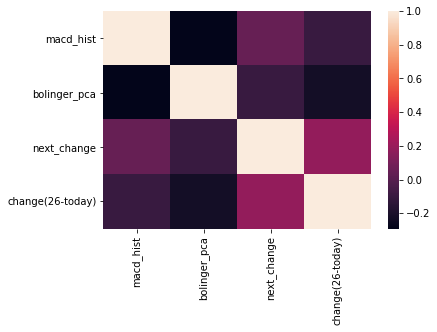

In [151]:
sns.heatmap(corr__)

- 이 단계에서 큰 상관관계를 찾기는 힘들겠다. 

In [155]:
scaler = MinMaxScaler()
scaled_samsung_2019 = scaler.fit_transform(samsung_2019_)

In [157]:
scaled_samsung_2019_df = pd.DataFrame(scaled_samsung_2019, columns=samsung_2019_.columns)
scaled_samsung_2019_df

,open,high,low,close,volume,change,ema12,ema26,ema12-ema26,macd,macd_signal,macd_hist,macd_9ma,macd-macd_signal,next_close,next_change
0,0.099744,0.091371,0.088773,0.067532,0.138911,0.514712,0.030732,0.039902,0.023989,0.023989,0.005570,0.465946,0.005570,0.465946,0.007792,0.134909
1,0.043478,0.048223,0.031332,0.007792,0.325565,0.134909,0.017011,0.026660,0.010391,0.010391,0.003751,0.436578,0.003751,0.436578,0.000000,0.449943
2,0.000000,0.000000,0.000000,0.000000,0.391666,0.449943,0.004003,0.013619,0.000000,0.000000,0.000000,0.419385,0.000000,0.419385,0.067532,0.924581
3,0.028133,0.065990,0.049608,0.067532,0.336768,0.924581,0.005118,0.008302,0.033980,0.033980,0.004510,0.492855,0.004510,0.492855,0.033766,0.293152
4,0.028133,0.081218,0.057441,0.033766,0.337073,0.293152,0.000000,0.000000,0.046202,0.046202,0.010819,0.508859,0.010819,0.508859,0.111688,0.981695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,0.953964,0.954315,0.953003,0.937662,0.219307,0.389369,0.960779,0.952457,0.868725,0.868725,0.770891,0.840017,0.770891,0.840017,0.911688,0.388383
242,0.928389,0.918782,0.937337,0.911688,0.301222,0.388383,0.966226,0.962069,0.851728,0.851728,0.801969,0.729152,0.801969,0.729152,0.932468,0.588059
243,0.882353,0.903553,0.916449,0.932468,0.211467,0.588059,0.974565,0.973048,0.844919,0.844919,0.825327,0.660485,0.825327,0.660485,0.989610,0.742373
244,0.933504,0.979695,0.973890,0.989610,0.319170,0.742373,0.991878,0.988932,0.866319,0.866319,0.848744,0.661006,0.848744,0.661006,0.953247,0.346926


In [158]:
scaled_samsung_2019_df.corr()

,open,high,low,close,volume,change,ema12,ema26,ema12-ema26,macd,macd_signal,macd_hist,macd_9ma,macd-macd_signal,next_close,next_change
open,1.000000,0.995600,0.995612,0.989124,-0.024564,-0.013738,0.963482,0.923149,0.655034,0.655034,0.657357,0.119234,0.657357,0.119234,0.971135,-0.095068
high,0.995600,1.000000,0.996136,0.995413,-0.005368,0.029296,0.967099,0.926688,0.657141,0.657141,0.660952,0.116122,0.660952,0.116122,0.978217,-0.091507
low,0.995612,0.996136,1.000000,0.995732,-0.043896,0.034093,0.964712,0.923756,0.658574,0.658574,0.660181,0.121597,0.660181,0.121597,0.978599,-0.091742
close,0.989124,0.995413,0.995732,1.000000,-0.025916,0.091817,0.958314,0.916319,0.660421,0.660421,0.653289,0.142569,0.653289,0.142569,0.984033,-0.085538
volume,-0.024564,-0.005368,-0.043896,-0.025916,1.000000,0.145719,-0.063101,-0.055196,-0.067844,-0.067844,-0.119190,0.108236,-0.119190,0.108236,-0.001124,0.106189
change,-0.013738,0.029296,0.034093,0.091817,0.145719,1.000000,-0.064617,-0.068666,-0.011921,-0.011921,-0.106138,0.220042,-0.106138,0.220042,0.112788,0.050027
ema12,0.963482,0.967099,0.964712,0.958314,-0.063101,-0.064617,1.000000,0.984475,0.555046,0.555046,0.645637,-0.108079,0.645637,-0.108079,0.939648,-0.095832
ema26,0.923149,0.926688,0.923756,0.916319,-0.055196,-0.068666,0.984475,1.000000,0.400425,0.400425,0.517120,-0.199110,0.517120,-0.199110,0.898933,-0.084135
ema12-ema26,0.655034,0.657141,0.658574,0.660421,-0.067844,-0.011921,0.555046,0.400425,1.000000,1.000000,0.919911,0.379368,0.919911,0.379368,0.638028,-0.100499
macd,0.655034,0.657141,0.658574,0.660421,-0.067844,-0.011921,0.555046,0.400425,1.000000,1.000000,0.919911,0.379368,0.919911,0.379368,0.638028,-0.100499


In [74]:
new_features_['change(26-today)_percent'] = (new_features_['close_26days_after']-new_features_['close'])/(new_features_['close'])*100

In [77]:
new_features_

,open,close,volume,macd_hist,next_close,next_change,change,bolinger_pca,close_26days_after,change(26-today),change(26-today)_percent
Date,,,,,,,,,,,
2019-01-02,39400,38750,7847664,14.884000,37600.0,-0.029677,0.001292,-10737.050454,46050.0,7300.0,18.838710
2019-01-03,38300,37600,12471493,-18.235868,37450.0,-0.003989,-0.029677,-11231.340214,46200.0,8600.0,22.872340
2019-01-04,37450,37450,14108958,-37.625003,38750.0,0.034713,-0.003989,-11640.870008,47500.0,10050.0,26.835781
2019-01-07,38000,38750,12748997,45.229798,38100.0,-0.016774,0.034713,-11878.100436,46050.0,7300.0,18.838710
2019-01-08,38000,38100,12756554,63.278199,39600.0,0.039370,-0.016774,-12086.801080,46200.0,8100.0,21.259843
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,56100,55500,9839252,436.735646,55000.0,-0.009009,-0.008929,11601.458289,NaN,NaN,NaN
2019-12-24,55600,55000,11868463,311.709059,55400.0,0.007273,-0.009009,11879.779420,NaN,NaN,NaN
2019-12-26,54700,55400,9645034,234.271052,56500.0,0.019856,0.007273,12158.501330,NaN,NaN,NaN


In [88]:
# 한달 후 수익률 10% 이상인 애들
new_features_[new_features_['change(26-today)_percent']>10].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2019-01-02 to 2019-10-10
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   open                      32 non-null     int64  
 1   close                     32 non-null     int64  
 2   volume                    32 non-null     int64  
 3   macd_hist                 32 non-null     float64
 4   next_close                32 non-null     float64
 5   next_change               32 non-null     float64
 6   change                    32 non-null     float64
 7   bolinger_pca              32 non-null     float64
 8   close_26days_after        32 non-null     float64
 9   change(26-today)          32 non-null     float64
 10  change(26-today)_percent  32 non-null     float64
dtypes: float64(8), int64(3)
memory usage: 3.0 KB


In [96]:
new_features_[new_features_['change(26-today)_percent']>10]

,open,close,volume,macd_hist,next_close,next_change,change,bolinger_pca,close_26days_after,change(26-today),change(26-today)_percent
Date,,,,,,,,,,,
2019-01-02,39400,38750,7847664,14.884000,37600.0,-0.029677,0.001292,-10737.050454,46050.0,7300.0,18.838710
2019-01-03,38300,37600,12471493,-18.235868,37450.0,-0.003989,-0.029677,-11231.340214,46200.0,8600.0,22.872340
2019-01-04,37450,37450,14108958,-37.625003,38750.0,0.034713,-0.003989,-11640.870008,47500.0,10050.0,26.835781
2019-01-07,38000,38750,12748997,45.229798,38100.0,-0.016774,0.034713,-11878.100436,46050.0,7300.0,18.838710
2019-01-08,38000,38100,12756554,63.278199,39600.0,0.039370,-0.016774,-12086.801080,46200.0,8100.0,21.259843
2019-01-09,38650,39600,17452708,176.824830,39800.0,0.005051,0.039370,-12206.567244,45950.0,6350.0,16.035354
2019-01-10,40000,39800,14731699,260.909618,40500.0,0.017588,0.005051,-12241.960801,46900.0,7100.0,17.839196
2019-01-11,40350,40500,11661063,353.434596,40050.0,-0.011111,0.017588,-12219.672465,46950.0,6450.0,15.925926
2019-01-14,40450,40050,11984996,372.203546,41100.0,0.026217,-0.011111,-12255.255223,47150.0,7100.0,17.727840


In [86]:
# 한달 후 수익률 5% 이상인 애들
new_features_[new_features_['change(26-today)_percent']>5].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87 entries, 2019-01-02 to 2019-11-21
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   open                      87 non-null     int64  
 1   close                     87 non-null     int64  
 2   volume                    87 non-null     int64  
 3   macd_hist                 87 non-null     float64
 4   next_close                87 non-null     float64
 5   next_change               87 non-null     float64
 6   change                    87 non-null     float64
 7   bolinger_pca              87 non-null     float64
 8   close_26days_after        87 non-null     float64
 9   change(26-today)          87 non-null     float64
 10  change(26-today)_percent  87 non-null     float64
dtypes: float64(8), int64(3)
memory usage: 8.2 KB


In [90]:
# 한달 후 수익률 1% 이상인 애들
new_features_[new_features_['change(26-today)_percent']>1].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2019-01-02 to 2019-11-21
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   open                      128 non-null    int64  
 1   close                     128 non-null    int64  
 2   volume                    128 non-null    int64  
 3   macd_hist                 128 non-null    float64
 4   next_close                128 non-null    float64
 5   next_change               128 non-null    float64
 6   change                    128 non-null    float64
 7   bolinger_pca              128 non-null    float64
 8   close_26days_after        128 non-null    float64
 9   change(26-today)          128 non-null    float64
 10  change(26-today)_percent  128 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 12.0 KB


In [91]:
# 한달 후 수익률 0% 이상인 애들
new_features_[new_features_['change(26-today)_percent']>0].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 135 entries, 2019-01-02 to 2019-11-21
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   open                      135 non-null    int64  
 1   close                     135 non-null    int64  
 2   volume                    135 non-null    int64  
 3   macd_hist                 135 non-null    float64
 4   next_close                135 non-null    float64
 5   next_change               135 non-null    float64
 6   change                    135 non-null    float64
 7   bolinger_pca              135 non-null    float64
 8   close_26days_after        135 non-null    float64
 9   change(26-today)          135 non-null    float64
 10  change(26-today)_percent  135 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 12.7 KB


In [92]:
# 한달 후 수익률 -인 애들
new_features_[new_features_['change(26-today)_percent']<0].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81 entries, 2019-01-25 to 2019-11-05
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   open                      81 non-null     int64  
 1   close                     81 non-null     int64  
 2   volume                    81 non-null     int64  
 3   macd_hist                 81 non-null     float64
 4   next_close                81 non-null     float64
 5   next_change               81 non-null     float64
 6   change                    81 non-null     float64
 7   bolinger_pca              81 non-null     float64
 8   close_26days_after        81 non-null     float64
 9   change(26-today)          81 non-null     float64
 10  change(26-today)_percent  81 non-null     float64
dtypes: float64(8), int64(3)
memory usage: 7.6 KB


In [95]:
new_features_[new_features_['change(26-today)_percent']<0]

,open,close,volume,macd_hist,next_close,next_change,change,bolinger_pca,close_26days_after,change(26-today),change(26-today)_percent
Date,,,,,,,,,,,
2019-01-25,44300,44750,22789395,522.702287,45050.0,0.006704,0.039489,-9540.631078,43800.0,-950.0,-2.122905
2019-01-28,45000,45050,17998914,563.093507,45500.0,0.009989,0.006704,-8947.112520,43650.0,-1400.0,-3.107658
2019-01-29,45050,45500,16215017,583.267579,46400.0,0.019780,0.009989,-8353.481450,44650.0,-850.0,-1.868132
2019-01-30,44800,46400,17505980,617.100940,46150.0,-0.005388,0.019780,-7685.553411,43850.0,-2550.0,-5.495690
2019-01-31,46650,46150,21621145,582.925267,46350.0,0.004334,-0.005388,-6944.456207,43850.0,-2300.0,-4.983749
...,...,...,...,...,...,...,...,...,...,...,...
2019-10-28,50700,51300,6431522,25.426907,51100.0,-0.003899,0.007859,6370.511943,49900.0,-1400.0,-2.729045
2019-10-29,51400,51100,7581629,3.107583,50400.0,-0.013699,-0.003899,6604.422681,49450.0,-1650.0,-3.228963
2019-10-30,50700,50400,8959435,-64.807705,50400.0,0.000000,-0.013699,6721.177612,49500.0,-900.0,-1.785714


In [94]:
len(new_features_[new_features_['change(26-today)_percent']<0].index)

81

-  수익율 구간에 따라서 답을 분류해둘수도 있겠다.
-  예를 들어 한달 후(특정기간 설정) 매도를 한다고 가정하고, close 종가 기준으로
-  20% 이상의 수익율을 얻으면 3, 5 ~ 20 % 사이면 2, 1~5% 면 1 수익율이 1% 이하면 0, -10% 이하면 -10 이런식으로 차감해 나가고.
-  점수의 총합을 높여가는 방향으로 모델을 만들기

-  이런경우 설정된 매도 시점이 될때까지 채점이 유보된다

In [97]:
new_features_

,open,close,volume,macd_hist,next_close,next_change,change,bolinger_pca,close_26days_after,change(26-today),change(26-today)_percent
Date,,,,,,,,,,,
2019-01-02,39400,38750,7847664,14.884000,37600.0,-0.029677,0.001292,-10737.050454,46050.0,7300.0,18.838710
2019-01-03,38300,37600,12471493,-18.235868,37450.0,-0.003989,-0.029677,-11231.340214,46200.0,8600.0,22.872340
2019-01-04,37450,37450,14108958,-37.625003,38750.0,0.034713,-0.003989,-11640.870008,47500.0,10050.0,26.835781
2019-01-07,38000,38750,12748997,45.229798,38100.0,-0.016774,0.034713,-11878.100436,46050.0,7300.0,18.838710
2019-01-08,38000,38100,12756554,63.278199,39600.0,0.039370,-0.016774,-12086.801080,46200.0,8100.0,21.259843
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,56100,55500,9839252,436.735646,55000.0,-0.009009,-0.008929,11601.458289,NaN,NaN,NaN
2019-12-24,55600,55000,11868463,311.709059,55400.0,0.007273,-0.009009,11879.779420,NaN,NaN,NaN
2019-12-26,54700,55400,9645034,234.271052,56500.0,0.019856,0.007273,12158.501330,NaN,NaN,NaN


In [105]:
# 답 저장 공간 생성
label = np.zeros(246)

In [125]:
# 인덱스 맞춰서 시리즈로 변환
label_ser = pd.Series(label, index=new_features_.index)

In [124]:
label_ser

Date
2019-01-02    0.0
2019-01-03    0.0
2019-01-04    0.0
2019-01-07    0.0
2019-01-08    0.0
             ... 
2019-12-23    0.0
2019-12-24    0.0
2019-12-26    0.0
2019-12-27    0.0
2019-12-30    0.0
Length: 246, dtype: float64

In [129]:
new_features_[new_features_['change(26-today)_percent']>20].index

DatetimeIndex(['2019-01-03', '2019-01-04', '2019-01-08'], dtype='datetime64[ns]', name='Date', freq=None)

In [137]:
# 한달 기준 수익율 구간별 점수 Input
label_ser[new_features_[new_features_['change(26-today)_percent']>20].index] = 5
label_ser[new_features_[(new_features_['change(26-today)_percent']>10)&(new_features_['change(26-today)_percent']<=20)].index] = 3
label_ser[new_features_[(new_features_['change(26-today)_percent']>3)&(new_features_['change(26-today)_percent']<=10)].index] = 1
label_ser[new_features_[(new_features_['change(26-today)_percent']>=1)&(new_features_['change(26-today)_percent']<=3)].index] = 0
label_ser[new_features_[(new_features_['change(26-today)_percent']<1)&(new_features_['change(26-today)_percent']>= -5)].index] = -3
label_ser[new_features_[(new_features_['change(26-today)_percent']< -5)&(new_features_['change(26-today)_percent']>= -10)].index] = -5
label_ser[new_features_[new_features_['change(26-today)_percent']< -10].index] = -10

In [136]:
# input 한 label 분포 확인
label_ser.value_counts()

 1.0     83
 0.0     50
-3.0     48
-5.0     30
 3.0     29
-10.0     3
 5.0      3
dtype: int64

- 보유기간별 change 를 기준으로 하여 위와 같이 구간별 수익율 기준으로 답을 구한 후, label 의 분포에 있어서 합이 높은 애들을 보유기간기준으로 잡아도 되겠다

- 그러나 어쨌든 강화학습 에이전트에는 '관망' 이 들어가기 때문에 반드시 해당 기간이 되면 매도 한다고는 볼수 없지만
- 확률적인 접근을 그런식으로 한다는 점

In [138]:
# input 한 label 분포 확인
label_ser.value_counts()

 1.0     83
-3.0     59
 0.0     39
-5.0     30
 3.0     29
-10.0     3
 5.0      3
dtype: int64

- 보유기간에 따라서 위와 같은 label 의 분포가 달라질것 같긴 하다.
- 예를 들면 기본적으로 -3 ~ 1점 구간(-5~10% 수익율 구간)이 제일 빈도가 높을 수 밖에 없고, 나머지는 보유기간이 늘어감에 따라 증가해갈것이다. 

In [140]:
# label을 데이터 프레임과 합치기
new_features_['TARGET'] = label_ser

In [145]:
new_features_[:50]

,open,close,volume,macd_hist,next_close,next_change,change,bolinger_pca,close_26days_after,change(26-today),change(26-today)_percent,TARGET
Date,,,,,,,,,,,,
2019-01-02,39400,38750,7847664,14.884000,37600.0,-0.029677,0.001292,-10737.050454,46050.0,7300.0,18.838710,3.0
2019-01-03,38300,37600,12471493,-18.235868,37450.0,-0.003989,-0.029677,-11231.340214,46200.0,8600.0,22.872340,5.0
2019-01-04,37450,37450,14108958,-37.625003,38750.0,0.034713,-0.003989,-11640.870008,47500.0,10050.0,26.835781,5.0
2019-01-07,38000,38750,12748997,45.229798,38100.0,-0.016774,0.034713,-11878.100436,46050.0,7300.0,18.838710,3.0
2019-01-08,38000,38100,12756554,63.278199,39600.0,0.039370,-0.016774,-12086.801080,46200.0,8100.0,21.259843,5.0
2019-01-09,38650,39600,17452708,176.824830,39800.0,0.005051,0.039370,-12206.567244,45950.0,6350.0,16.035354,3.0
2019-01-10,40000,39800,14731699,260.909618,40500.0,0.017588,0.005051,-12241.960801,46900.0,7100.0,17.839196,3.0
2019-01-11,40350,40500,11661063,353.434596,40050.0,-0.011111,0.017588,-12219.672465,46950.0,6450.0,15.925926,3.0
2019-01-14,40450,40050,11984996,372.203546,41100.0,0.026217,-0.011111,-12255.255223,47150.0,7100.0,17.727840,3.0


- 매수/ 매도/ 관망 행위를 반복한다고 했을때, 매수시 해당 위치의 Target 값들의 누적합이 가장 높은 방향으로 모델이 학습하도록 해야한다

- 대충 아이디어
     - 점수가 높으면(3점 이상) 매수
     - 0~1이면 보유 잔고를 보고 유보 혹은 매수 결정
     - 마이너스 점수면 점수에 따라 분할 매도 
     
     
   - 이미 매수한 애들에 대해서는
     - 한달 기준으로 10% 이상이면 매도 - 매수 결정한 애한테 가중치 부여
     - 아니면 점수를 보고, 유보 혹은 매도 결정

In [144]:
# 내일 해볼것 : 위의 데이터를 train 데이터로 생각하고 학습시키고, 학습된 모델로 나머지 2020년 데이터를 돌려서 답을 확인해볼것.
# 알고리즘은 선형회귀를 써본 후 LSTM 을 써봐서 시계열에 적합여부를 비교해보기
# 피처는 일단 boligner pca, macd, macdsignal, macd_hist로 학습을 시키고 답은 Target으로 간소화 시키자.